In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import testStreamingSvd
import streamingSvd as algo

In [13]:
#import os
#if not os.path.isfile('AR.dat'):
#        print ("Generating and saving data")
#        A = generateARdata(1000)
#        np.savetxt('AR.dat', A)


#dat = np.loadtxt('AR.dat')
row =  30
dat = testStreamingSvd.generateARdata(row,1000)

<IPython.core.display.Javascript object>


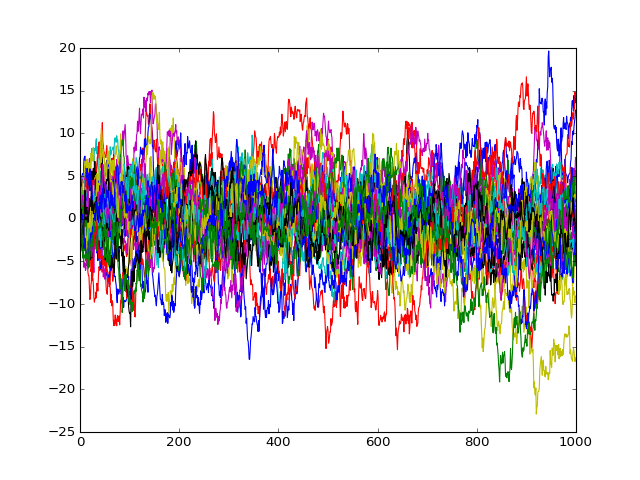

In [5]:
plt.plot(dat.T);

In [14]:
Q = algo.getSvd(dat, row, row, 5, 1000)

In [15]:
U, S, V = np.linalg.svd(dat, full_matrices=False)

In [16]:
num_mismatch = 0
for i in range(row):
    if (not np.allclose(Q[:,i], U[:,i], 1e-1, 1e-1) and not np.allclose(Q[:,i],-U[:,i],1e-1, 1e-1)):
        print ("Mismatch in %d column\n"%i)
        for j in range(row):
            if (not np.allclose(Q[j,i], U[j,i], 1e-1, 1e-1) and not np.allclose(Q[j,i],-U[j,i],1e-1, 1e-1)):
                print ("Mismatch in %d row %f %f\n"%(j, Q[j,i], U[j,i]))
        num_mismatch = num_mismatch + 1
print ("Number mismatched: %d\n"%num_mismatch)


Number mismatched: 0

